In [53]:
import pandas as pd
import os 
import cv2
import PIL
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

In [83]:
# Function to extract the base PatientID by removing numeric suffixes
def get_base_patient_id(patient_id):
    parts = patient_id.split('_')
    if parts[-1].isdigit():
        return '_'.join(parts[:-1])
    else:
        return patient_id

# Load the metadata from dicom_info.csv
dicom_data = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')

In [84]:
# Create a new column for the base PatientID
dicom_data['base_PatientID'] = dicom_data['PatientID'].apply(get_base_patient_id)

# Filter for full mammogram images
full_mammograms = dicom_data[dicom_data['SeriesDescription'] == 'full mammogram images']

# Filter for ROI mask images
roi_masks = dicom_data[dicom_data['SeriesDescription'] == 'ROI mask images']

# Group ROI mask image paths by base_PatientID
roi_masks_grouped = roi_masks.groupby('base_PatientID')['image_path'].apply(list).to_dict()

In [85]:
# Define the base directory for image files
image_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

# Create a list to store pairs of full mammogram and ROI mask paths
pairs = []

# Pair each full mammogram with its corresponding ROI masks
for index, row in full_mammograms.iterrows():
    base_pid = row['base_PatientID']
    full_mammogram_path = row['image_path'].replace('CBIS-DDSM/jpeg', image_dir)
    if base_pid in roi_masks_grouped:
        for roi_path in roi_masks_grouped[base_pid]:
            roi_path_adjusted = roi_path.replace('CBIS-DDSM/jpeg', image_dir)
            pairs.append((full_mammogram_path, roi_path_adjusted))

In [88]:
pairs[0]

('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg',
 '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.157873313111008204717745471110978322176/2-223.jpg')

In [118]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def show_img(path1, path2):
    # Read the full mammogram and binary ROI mask images in grayscale
    img1 = cv2.imread(path1, 0)
    img2 = cv2.imread(path2, 0)
    
    # Create a custom colormap for the binary ROI mask (white -> yellow, black -> transparent)
    colors = [(0, 0, 0, 0), (1, 1, 0, 0.5)]  # Black (0) is transparent, white (255) is yellow with 50% opacity
    cmap_name = 'binary_to_yellow'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
    
    # Create a figure
    plt.figure(figsize=(10, 10))
    
    # Display the full mammogram with 'bone' colormap
    plt.imshow(img1, cmap='bone')
    
    # Overlay the binary ROI mask with the custom colormap
    plt.imshow(img2, cmap=cm, interpolation='nearest')
    
    # Add title and hide axes for cleaner display
    plt.title('Full Mammogram MRI and Mask')
    plt.axis('off')
    
    plt.show()

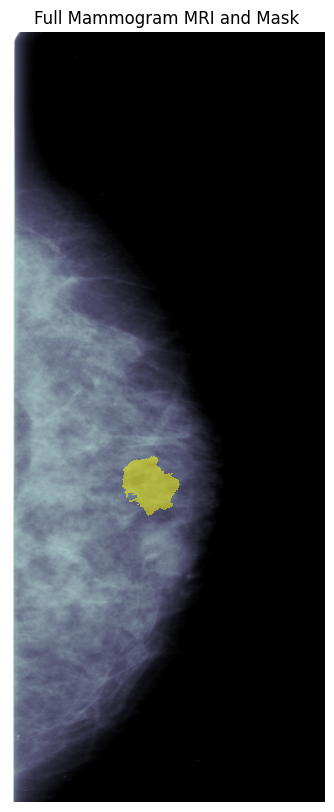

In [119]:
idx = 100
show_img(pairs[idx][0], pairs[idx][1])

In [120]:
import cv2
import os
import pathlib

def save_image_pairs(image_pairs, output_dir):
    """
    Save pairs of full mammogram images and ROI masks with specific naming conventions.
    
    Args:
        image_pairs (list of tuples): List of (full_mammogram_path, roi_mask_path) tuples.
        output_dir (str): Directory where images will be saved.
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    for full_path, mask_path in image_pairs:
        # Read the images in grayscale
        full_img = cv2.imread(full_path, 0)
        mask_img = cv2.imread(mask_path, 0)
        
        # Skip if either image failed to load
        if full_img is None or mask_img is None:
            print(f"Warning: Could not load images - Full: {full_path}, Mask: {mask_path}")
            continue
        
        # Extract the base filename (without extension) from the full mammogram path
        base_name = pathlib.Path(full_path).stem
        
        # Construct output filenames
        full_output_path = os.path.join(output_dir, f"{base_name}.png")
        mask_output_path = os.path.join(output_dir, f"{base_name}_mask.png")
        
        # Save the images
        cv2.imwrite(full_output_path, full_img)
        cv2.imwrite(mask_output_path, mask_img)
        print(f"Saved: {full_output_path} and {mask_output_path}")

In [121]:
save_image_pairs(pairs, 'CBIS_DDSM_Dataset')

Saved: CBIS_DDSM_Dataset/1-249.png and CBIS_DDSM_Dataset/1-249_mask.png
Saved: CBIS_DDSM_Dataset/1-032.png and CBIS_DDSM_Dataset/1-032_mask.png
Saved: CBIS_DDSM_Dataset/1-128.png and CBIS_DDSM_Dataset/1-128_mask.png
Saved: CBIS_DDSM_Dataset/1-248.png and CBIS_DDSM_Dataset/1-248_mask.png
Saved: CBIS_DDSM_Dataset/1-007.png and CBIS_DDSM_Dataset/1-007_mask.png
Saved: CBIS_DDSM_Dataset/1-007.png and CBIS_DDSM_Dataset/1-007_mask.png
Saved: CBIS_DDSM_Dataset/1-074.png and CBIS_DDSM_Dataset/1-074_mask.png
Saved: CBIS_DDSM_Dataset/1-007.png and CBIS_DDSM_Dataset/1-007_mask.png
Saved: CBIS_DDSM_Dataset/1-086.png and CBIS_DDSM_Dataset/1-086_mask.png
Saved: CBIS_DDSM_Dataset/1-067.png and CBIS_DDSM_Dataset/1-067_mask.png
Saved: CBIS_DDSM_Dataset/1-032.png and CBIS_DDSM_Dataset/1-032_mask.png
Saved: CBIS_DDSM_Dataset/1-079.png and CBIS_DDSM_Dataset/1-079_mask.png
Saved: CBIS_DDSM_Dataset/1-033.png and CBIS_DDSM_Dataset/1-033_mask.png
Saved: CBIS_DDSM_Dataset/1-141.png and CBIS_DDSM_Dataset/1-141_m

In [122]:
import shutil
shutil.make_archive('CBIS_DDSM_Dataset', 'zip', 'CBIS_DDSM_Dataset')

'/kaggle/working/CBIS_DDSM_Dataset.zip'

In [123]:
from IPython.display import FileLink
FileLink(r'CBIS_DDSM_Dataset.zip')

/kaggle/working/CBIS_DDSM_Dataset.zip